In [1074]:
from mnist import MNIST 
import numpy as np
from pylab import *
from matplotlib import colors
%matplotlib inline

mndata = MNIST('./data')

mndata.load_training()
img_side = 28
n_mnist_pixels = img_side*img_side

In [1075]:
labels = mndata.train_labels

cluster_size = 10
train_inputs_idx = []
for idx in [0, 4]:
    label_idx = np.where(np.isin(labels,[idx]))[0][:cluster_size]
    train_inputs_idx.append(label_idx)

samples_idx = np.array(train_inputs_idx, dtype='int').flatten()
samples_idx.size

20

In [1076]:
images = []
for sample_idx in samples_idx.flatten():
    images.append(mndata.train_images[sample_idx])

images = np.array(images, dtype='float')
images = images / 255
images.shape

(20, 784)

In [1077]:
def simple_plot(T: list):
    T_arr = np.array(T, dtype=float)

    fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
    axs.plot(np.arange(T_arr.size), T_arr)


    plt.show()

In [1078]:
from typing import Literal

def show_image(image: ndarray, cmap: Literal['bone', 'Greys'] = 'bone'):
    # figure(figsize=(15, 10))

    imshow(np.array(image),
        interpolation='none',
        aspect='equal',
        cmap=cmap,
        )

    axis("off")

    show()

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 8. 7. 6. 5. 4. 0. 0.]
 [0. 0. 8. 0. 8. 7. 6. 5. 0. 0.]
 [0. 0. 7. 8. 0. 8. 7. 6. 0. 0.]
 [0. 0. 6. 7. 8. 0. 8. 7. 0. 0.]
 [0. 0. 5. 6. 7. 8. 0. 8. 0. 0.]
 [0. 0. 4. 5. 6. 7. 8. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


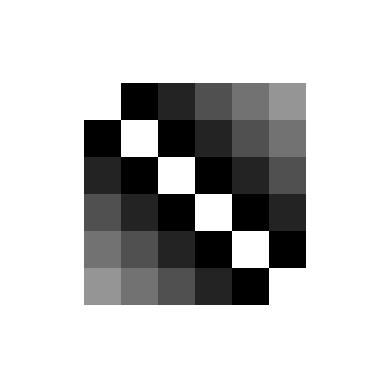

In [1079]:
def get_discount_matrix(size, rev = False, cor_supr_size=0):
    a = np.arange(size)
    if rev:
        a = np.abs(np.abs(a - a[np.newaxis].T) - np.max(a))
    else:
        a = np.abs(a - a[np.newaxis].T)
    np.fill_diagonal(a, 0)

    if cor_supr_size > 0:
        a[:cor_supr_size] = 0
        a[:, 0:cor_supr_size] = 0
        a[-cor_supr_size:] = 0
        a[:, -cor_supr_size:] = 0

    return a

a = get_discount_matrix(10, rev=True, cor_supr_size=2)
a = np.array(a, dtype='float')
# a[:, 0:2] = 0
print(a)
show_image(a, cmap='Greys')

In [1080]:
def show_images_table(images_2d: ndarray, img_side: int = 28, row_size=10):
    column_size = int(images.shape[0] / row_size)

    shaped_images = images_2d.reshape(column_size, row_size, img_side, img_side)
    shaped_images = shaped_images.swapaxes(1, 2).reshape(column_size*img_side, row_size*img_side)

    figure(figsize=(15, 10))

    imshow(shaped_images,
           interpolation='none',
           aspect='equal',
           cmap='bone',
           )
    
    axis("off")

# show_images_table(images_2d=images)
images.shape

(20, 784)

In [1081]:
def infer(input: ndarray, W: ndarray, iter_cnt: int):
    I = np.copy(input)

    O = np.zeros(I.size)

    T = []
    OST = []

    for iter_idx in range(iter_cnt):
        DO = np.exp((I - W)**2 * -20.0)
        O += np.sum(DO, axis=1)

        O = O ** 2

        # inhibition
        O[np.where(O < np.mean(O))] = 0

        # recur
        O /= np.max(O)

        I = np.copy(O)

        # stats
        # t = np.sum(O > 0)
        t = np.mean(O)
        # t = np.sum(O)

        T.append(t)

        OST.append(np.copy(O))
    
    return T, OST


In [1082]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
m = np.array([1, 2, 3, 4])
m
n = m*2
# nm = n * m[np.newaxis].T
nm = n[np.newaxis].T * m
nm

array([[ 2,  4,  6,  8],
       [ 4,  8, 12, 16],
       [ 6, 12, 18, 24],
       [ 8, 16, 24, 32]])

In [1083]:
b = np.arange(8)
b[-2:] = 0
b[:2] = 0
b

array([0, 0, 2, 3, 4, 5, 0, 0])

- TODO: temporal W during relaxation, then update real W
- TODO: statistical (axonal) weights. Update S during relaxing? Energy is amount of active Neurons or dendrite error?
- TODO: Temperatura - increase then decrease.
- TODO: Dendrites' stats weight.
- TODO: weight decay

- TODO: associative (serotonin) weights update?

In [1084]:
a = np.random.rand(2, 4)
a

array([[0.14983043, 0.91109023, 0.31855006, 0.24217511],
       [0.37277825, 0.63211551, 0.10376724, 0.60180799]])

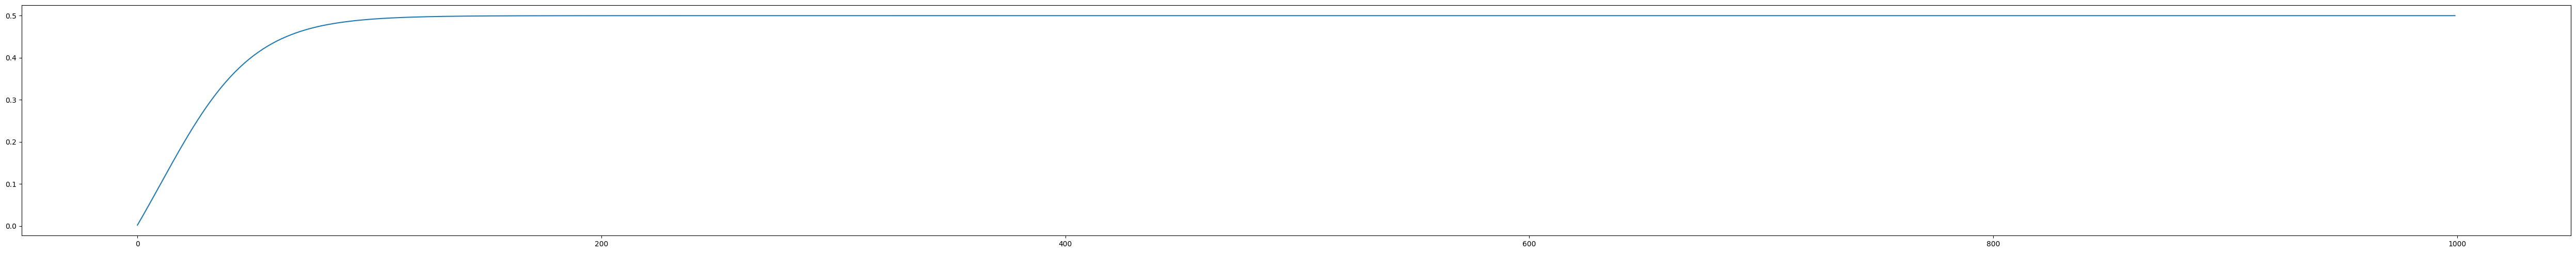

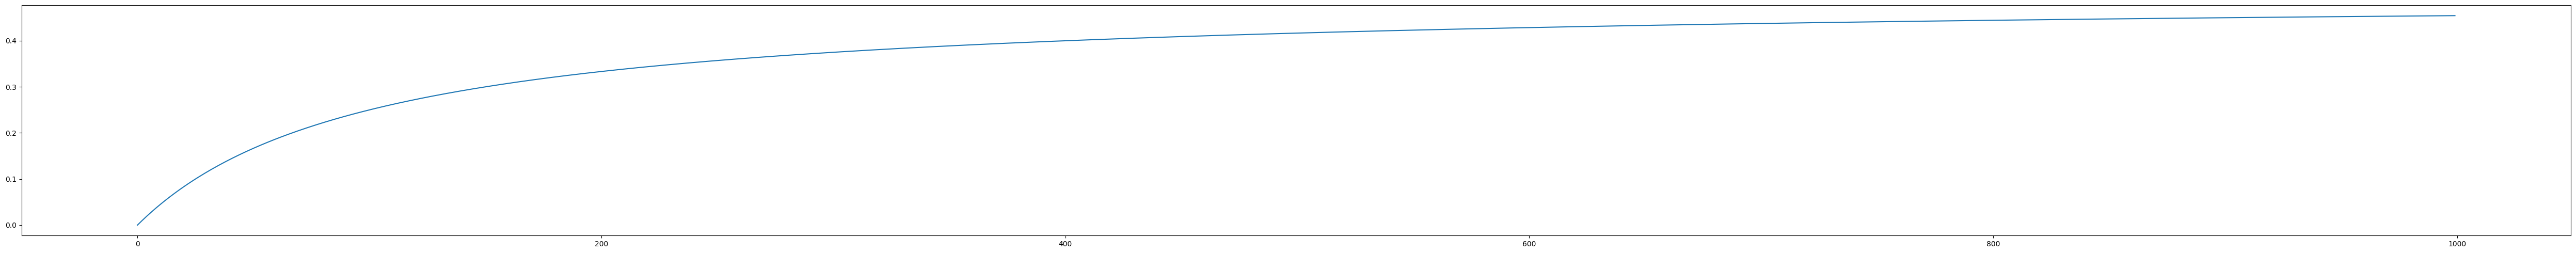

In [1085]:
def activation(O: ndarray, c2 = -5, b2 = 0.2, b = 0.3, b1 = 0.8):
    a1 = 5 # 2
    # b1 = 1
    c1 = -0.1

    f1 = 1 / (1 + np.exp(-a1 * (O + c1))) * b1 - 0.3

    a2 = -5

    f2 = (1 / (1 + np.exp(-a2 * (O + c2)))) * b2 + b

    return f1 # * f2

TA = []
TA_2 = []
for ta_idx in range(1000):
    ta = activation(O=ta_idx * 0.01)
    TA.append(ta)
    ta_2 = ((ta_idx * 0.01) / (1 + np.abs((ta_idx * 0.01)))) * 0.5
    TA_2.append(ta_2)

simple_plot(T=TA)
simple_plot(T=TA_2)

In [1086]:
def relax(I: ndarray,
          inp_S: ndarray,
          W: ndarray,
          inp_NS: ndarray,
          NW: ndarray,
          inp_PS: ndarray,
          inp_NPS: ndarray,
          iter_cnt=100,
          ddsc=1.0,
          s_axis = 0,
          eps0 = 0.01,
          c_ps = 0.1,
          eq_cp: int = 5,
          soft_thre: float = 1.0,
          S_C: Literal['eps', 'R', None] = None,
          ):
    S = np.copy(inp_S)
    NS = np.copy(inp_NS)
    O = np.zeros(S.shape[0])

    prev_S = np.copy(inp_S)
    prev_NS = np.copy(inp_NS)
    prev_O = np.copy(O)
    prev_SO = np.zeros(S.shape)
    prev_NSO = np.zeros(NS.shape)

    SP = []
    MP = []
    CP = []
    DP = []

    OST = []

    is_break = False

    # inp_PS *= c_ps
    # inp_NPS *= c_ps

    eq_cp_cnt = 0

    for iter_idx in range(iter_cnt):
        eps = (iter_cnt - iter_idx) * eps0

        # infer
        np.fill_diagonal(S, 0)
        SO = I * S
        DO = np.exp((SO - W)**2 * -20.0)
        # DO *= inp_PS
        np.fill_diagonal(DO, 0)
        dO = np.sum(DO, axis=1)
        dO /= np.max(dO)
        O += dO

        # inhibition infer
        np.fill_diagonal(NS, 0)
        NSO = O * NS
        NDO = np.exp((NSO - NW)**2 * -20.0)
        # NDO *= inp_NPS
        np.fill_diagonal(NDO, 0)
        dNO = np.sum(NDO, axis=1)
        dNO /= np.max(dNO)
        O -= dNO

        # soft threshold
        print(f'{np.max(O)=} {np.min(O)=} {np.mean(O)=}')
        # O = (O / (1 + np.abs(O))) * soft_thre
        O = activation(O=O, c2=-7, b2=0.2, b=0.3)

        # inhibition
        O[np.where(O < 0)] = 0

        # train inh stats S
        R = (np.random.rand(S.shape[0], S.shape[1]) * eps0)
        NO = O # / np.max(O)
        if S_C == 'R':
            ddS = NO * I[np.newaxis].T * R
        if S_C == 'eps':
            ddS = NO * I[np.newaxis].T * eps
        else:
            ddS = NO * I[np.newaxis].T
        # ddS /= np.max(np.abs(ddS))

        dNS = np.copy(ddS)

        # inh update
        NS += dNS**ddsc

        # train stats S
        dS = np.copy(ddS)

        # update
        S += dS**ddsc

        # stats
        SP.append(np.sum(O))
        MP.append(np.mean(O[np.where(O > 0)]))
        CP.append(np.sum(O > 0))
        DP.append(np.sum(np.abs(SO - W) + np.abs(NSO - NW)))

        # recur
        # O /= np.max(O)

        I = np.copy(O)

        max_S = np.max(S, axis=s_axis)
        if np.max(max_S) > 1:
            # print(f'{np.max(max_S)=}')
            if s_axis == 1:
                S /= max_S[np.newaxis].T
            else:
                S /= max_S
            # print(f'{np.max(S)=}')

        max_NS = np.max(NS, axis=s_axis)
        if np.max(max_NS) > 1:
            # print(f'{np.max(max_NS)=}')
            if s_axis == 1:
                NS /= max_NS[np.newaxis].T
            else:
                NS /= max_NS

        # prev
        if not is_break:
            prev_S = np.copy(S)
            prev_NS = np.copy(NS)
            prev_O = np.copy(O)
            prev_SO = np.copy(SO)
            prev_NSO = np.copy(NSO)

        # stats
        OST.append(np.copy(O))

        # break
        if iter_idx > 1 and MP[iter_idx-1] > MP[iter_idx] and MP[iter_idx-1] > MP[iter_idx - 2]:
            # break
            depth = (MP[iter_idx-1] - MP[iter_idx]) + (MP[iter_idx-1] - MP[iter_idx - 2])
            # print(f'Mean Out break: {iter_idx-1=} {depth=}')
            # break
        
        if iter_idx > 1 and DP[iter_idx-1] < DP[iter_idx] and DP[iter_idx-1] < DP[iter_idx - 2]:
            depth = (DP[iter_idx] - DP[iter_idx-1]) + (DP[iter_idx - 2] - DP[iter_idx-1])
            print(f'Err break: {iter_idx-1=} {depth=} {DP[iter_idx-1]=}')
            # break
            is_break = True
        
        if iter_idx > 1 and CP[iter_idx-1] == CP[iter_idx]:
            eq_cp_cnt += 1
        else:
            eq_cp_cnt = 0
        
        if eq_cp_cnt == eq_cp:
            print(f'CP break: {iter_idx=} {CP[iter_idx]=}')
            # break
            # is_break = True

    return prev_S, prev_NS, prev_O, prev_SO, prev_NSO, SP, MP, CP, DP, OST


In [1087]:
layer_size = n_mnist_pixels

I = np.zeros(n_mnist_pixels)
O = np.zeros(layer_size)
W = np.random.rand(O.size, I.size)
NW = np.random.rand(O.size, I.size)

s_c = 0.01
S = np.random.rand(O.size, I.size) * s_c
NS = np.random.rand(O.size, I.size) * s_c

ps_c = 0.01
PS = np.random.rand(O.size, I.size) * ps_c
NPS = np.random.rand(O.size, I.size) * ps_c

print('W', W.shape, W.max(), W.min(), np.median(W))
print(f'{S.shape=} {S.max()=} {S.min()=} {np.median(S)=}')

thre_S = 0.05

iter_cnt = 100 * 1

epoch_cnt = 1

eps0 = 0.0001
eps = eps0

DP = []
CP = []
SP = []
MP = []

for epoch_idx in range(epoch_cnt):
    eps = (epoch_cnt - epoch_idx) * eps0

    for img in images[:1]:
        I = np.copy(img)
        print(f'{I.shape=} {I.max()=} {I.min()=} {np.median(I)=}')

        prev_S, prev_NS, O, SO, NSO, rlx_SP, rlx_MP, rlx_CP, rlx_DP, OST = relax(I=I,
                                                                                 inp_S=S,
                                                                                 W=W,
                                                                                 inp_NS=NS,
                                                                                 NW=NW,
                                                                                 inp_PS=PS,
                                                                                 inp_NPS=NPS,
                                                                                 iter_cnt=100 * 1,
                                                                                 ddsc=1.0,
                                                                                 s_axis=0,
                                                                                 S_C=None,
                                                                                 eps0=0.01,
                                                                                 soft_thre=0.5,
                                                                                 eq_cp=10,
                                                                                 c_ps=1.0, )

        threshold = np.mean(O)

        # stats train
        ddS = O * I[np.newaxis].T * eps

        # S train
        dS = np.copy(ddS)
        dS[np.where(O <= threshold)] = 0

        # train
        dW = (SO - W) * eps
        dW[np.where(O <= threshold)] = 0

        # update
        W += dW
        # S += dS
        PS += dS

        # inh S train
        dNS = np.copy(ddS)
        dNS[np.where(O > threshold)] = 0

        # inh train
        dNW = (NSO - NW) * eps
        dNW[np.where(O > threshold)] = 0

        # inh update
        NW += dNW
        # NS += dNS
        NPS += dNS

        # stats
        DP.extend(rlx_DP)
        CP.extend(rlx_CP)
        SP.extend(rlx_SP)
        MP.extend(rlx_MP)

        # recur S
        max_S = np.max(S, axis=0)
        if np.max(max_S) > 1:
            S /= max_S

        max_NS = np.max(NS, axis=0)
        if np.max(max_NS) > 1:
            NS /= max_NS
        
        # recur dendritic S
        max_PS = np.max(PS, axis=1)
        if np.max(max_PS) > 1:
            PS /= max_PS[np.newaxis].T

        max_NPS = np.max(NPS, axis=1)
        if np.max(max_NPS) > 1:
            NPS /= max_NPS[np.newaxis].T

print('W', W.shape, W.max(), W.min(), np.median(W))
print(f'{S.shape=} {S.max()=} {S.min()=} {np.median(S)=}')
print(f'{PS.shape=} {PS.max()=} {PS.min()=} {np.median(PS)=}')


W (784, 784) 0.9999984796591491 9.771908880962243e-07 0.49947770927663826
S.shape=(784, 784) S.max()=0.009999940929380526 S.min()=1.5863424726036968e-08 np.median(S)=0.004987776838171808
I.shape=(784,) I.max()=1.0 I.min()=0.0 np.median(I)=0.0
np.max(O)=0.20110342206404275 np.min(O)=-0.22140519071544307 np.mean(O)=-0.021917927872245935
np.max(O)=0.4319843887682364 np.min(O)=-0.18075516596306007 np.mean(O)=0.023945256147450935
np.max(O)=0.5739148610308382 np.min(O)=-0.18178898289422063 np.mean(O)=0.05017198580279698
np.max(O)=0.5202812920563217 np.min(O)=-0.19407055507494675 np.mean(O)=0.05078019134466052
np.max(O)=0.45877590841005245 np.min(O)=-0.212493807443365 np.mean(O)=0.02084837395905619
np.max(O)=0.45243409193598105 np.min(O)=-0.19329831052097068 np.mean(O)=0.01063002900922241
np.max(O)=0.46446540188438323 np.min(O)=-0.17130364111791252 np.mean(O)=0.010601152019134401
np.max(O)=0.4757557884275564 np.min(O)=-0.1610542838591289 np.mean(O)=0.007694577863357169
Err break: iter_idx-1=6

In [1088]:
# a = 1
# cnt = 100
# A =[]
# for i in range(cnt):
#     a = (a + a * 0.05)
#     # a = (a0 ** i) * 0.01
#     A.append(a * 0.01)

# simple_plot(A)

CP[-1]=173


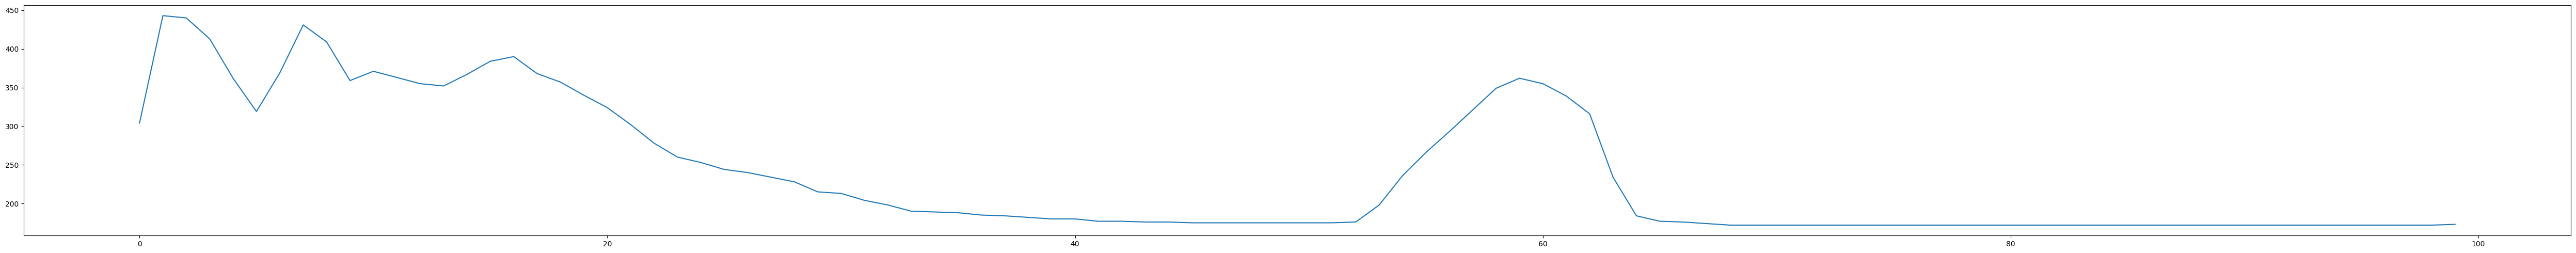

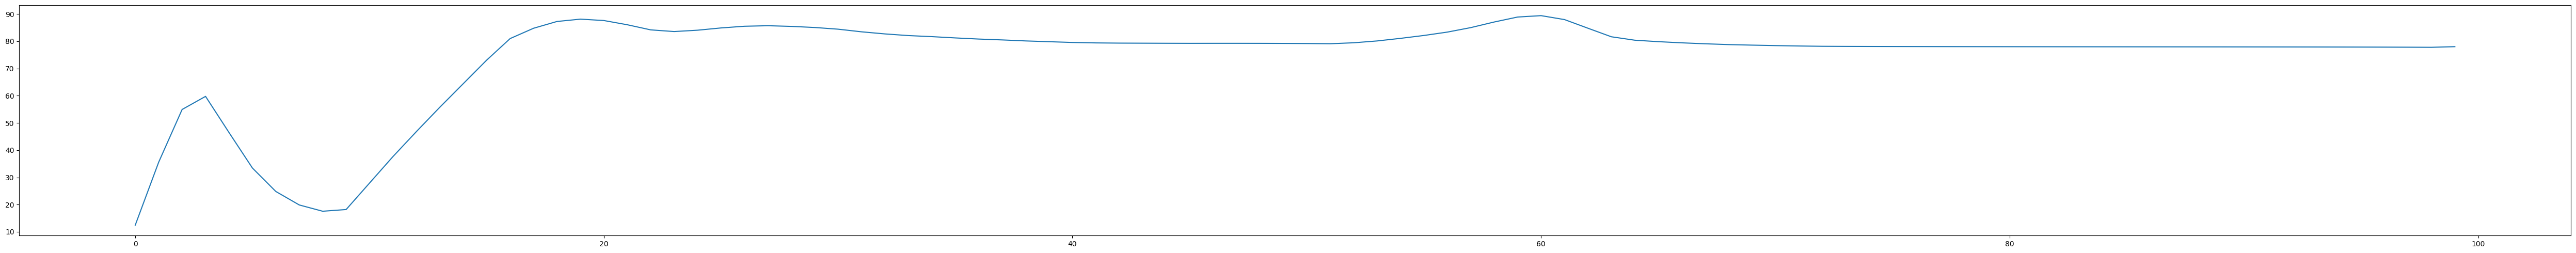

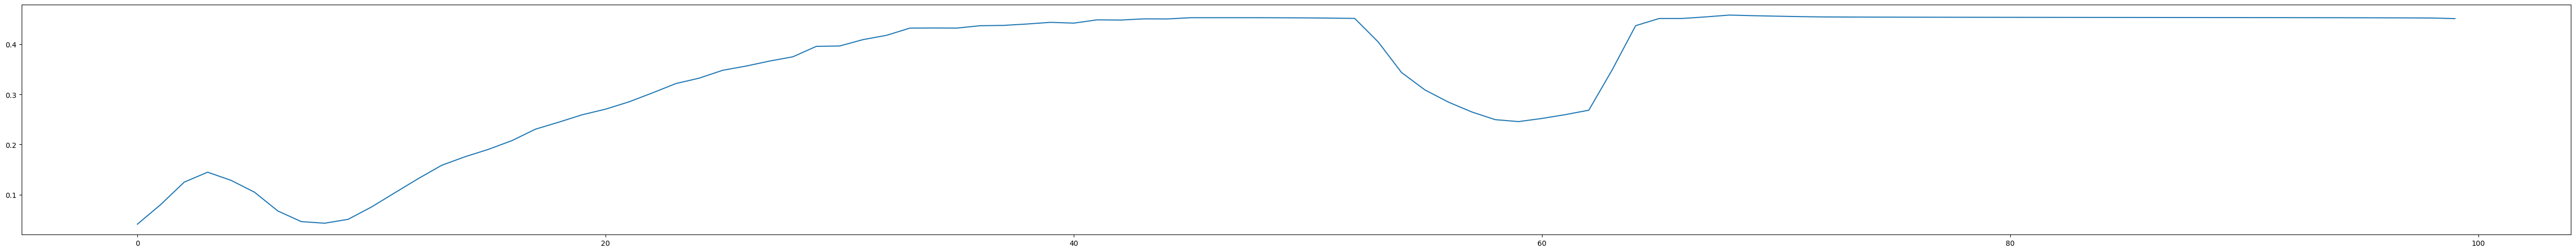

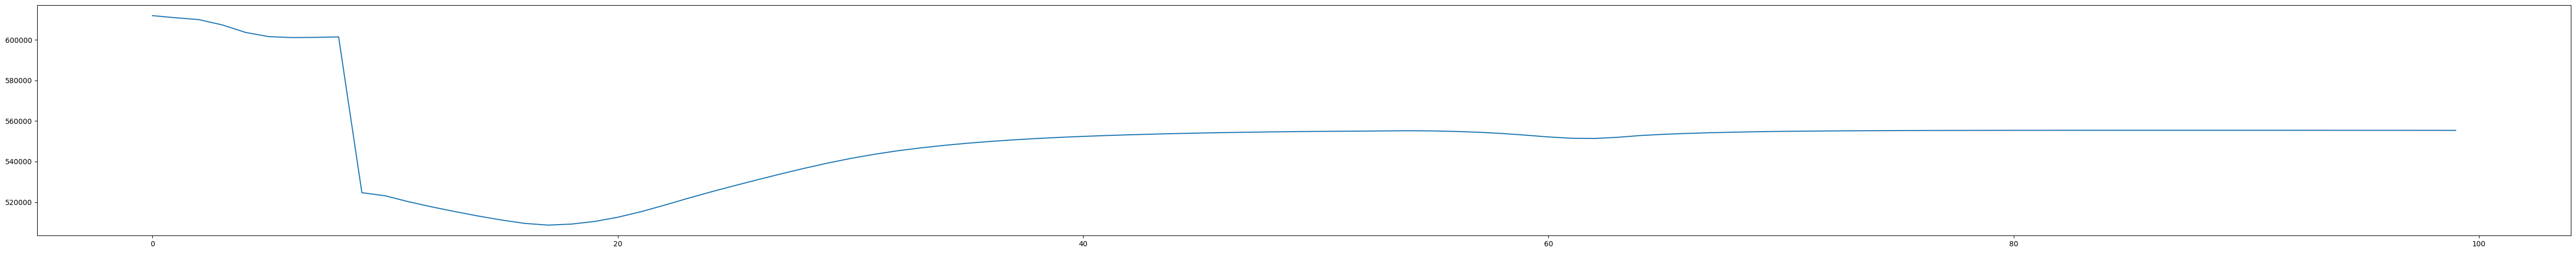

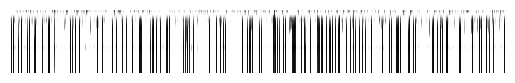

In [1089]:
print(f'{CP[-1]=}')
simple_plot(T=CP)
simple_plot(T=SP)
simple_plot(T=MP)
simple_plot(T=DP)

show_image(image=OST, cmap='Greys')

In [1090]:
# arr_CP = np.array(CP, dtype=float)
# arr_DP = np.array(DP, dtype=float)
# arr_CP = arr_CP.max() - arr_CP
# arr_CP /= arr_CP.max()

# arr_DP /= arr_DP.max()
# # inv_DP = 1 / arr_DP

# arr_SU = arr_DP + arr_CP

# simple_plot(T=arr_SU)
# arr_SU[:5]

In [1091]:
CP[:10]

[304, 443, 440, 413, 362, 319, 369, 431, 409, 359]

In [1092]:
DP[:10]

[611897.0709114611,
 610843.7761924942,
 609931.0164861804,
 607322.7903037431,
 603624.1972362879,
 601555.8581833849,
 601094.1811244627,
 601187.9506913914,
 601431.8057145546,
 524673.2548996196]

In [1093]:
a = np.array([[1,2,3,4],[5,6,7,8]]) * 1.0
max_a = np.max(a, axis=1) * 1.0
# a * (a > 2)
a /= max_a[np.newaxis].T
a

array([[0.25 , 0.5  , 0.75 , 1.   ],
       [0.625, 0.75 , 0.875, 1.   ]])

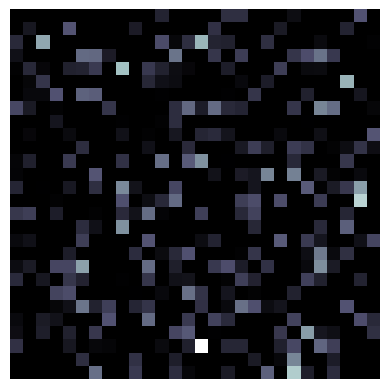

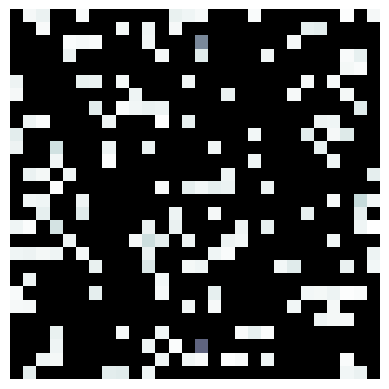

In [1094]:
al = np.copy(OST[0])
al = al.reshape(img_side, img_side)
show_image(al)

al = np.copy(OST[-1])
al = al.reshape(img_side, img_side)
show_image(al)

In [1095]:
# arr = np.array(MP[125:135])
# arr = arr - np.pad(arr, (1, 0))[:-1]
# CP[130]

i_T[-1]=0.3848827996370682


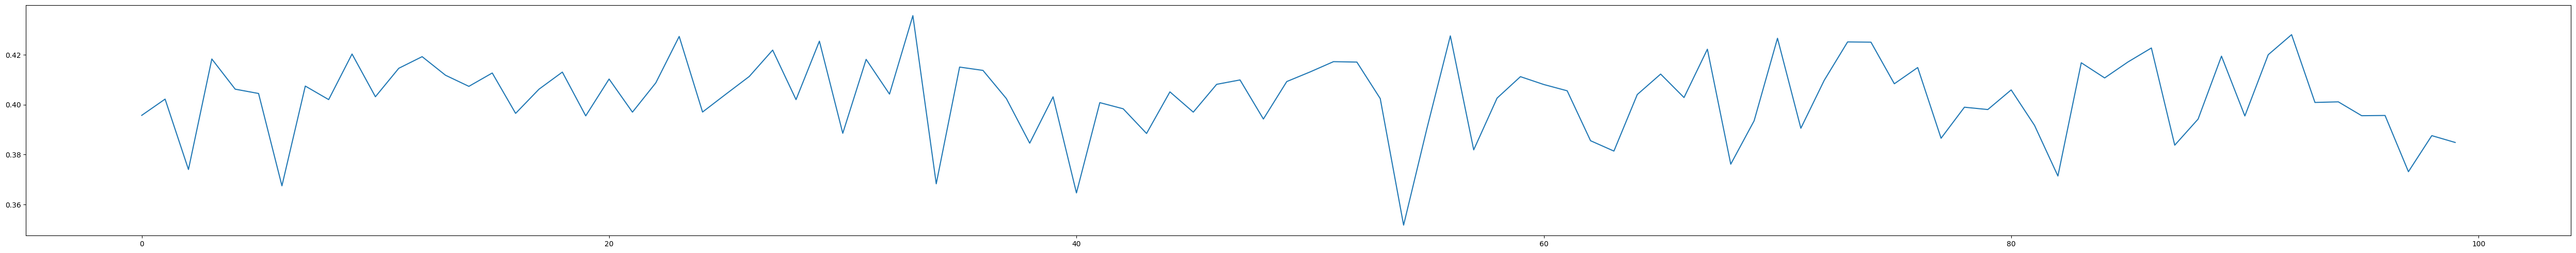

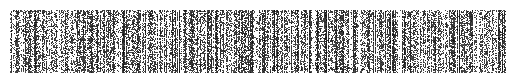

In [1096]:
i_T, i_OST = infer(input=images[1], W=W, iter_cnt=iter_cnt)

print(f'{i_T[-1]=}')
simple_plot(T=i_T)

show_image(image=i_OST, cmap='Greys')

[[  0.   2.   4. ... 194. 196. 198.]
 [  2.   0.   2. ... 192. 194. 196.]
 [  4.   2.   0. ... 190. 192. 194.]
 ...
 [194. 192. 190. ...   0.   2.   4.]
 [196. 194. 192. ...   2.   0.   2.]
 [198. 196. 194. ...   4.   2.   0.]]


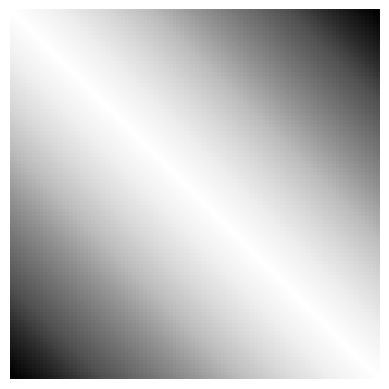

In [1097]:
a = get_discount_matrix(100)
a = np.array(a, dtype='float')
a *= 2
print(a)
show_image(a, cmap='Greys')